     Age  Gender Education Level                  Job Title  \
0   32.0    Male      Bachelor's          Software Engineer   
1   28.0  Female        Master's               Data Analyst   
2   45.0    Male             PhD             Senior Manager   
3   36.0  Female      Bachelor's            Sales Associate   
4   52.0    Male        Master's                   Director   
..   ...     ...             ...                        ...   
95  39.0  Female      Bachelor's        Training Specialist   
96  47.0    Male             PhD         Research Scientist   
97  26.0    Male      Bachelor's  Junior Software Developer   
98  38.0  Female        Master's   Public Relations Manager   
99  45.0    Male      Bachelor's         Operations Analyst   

    Years of Experience    Salary  
0                   5.0   90000.0  
1                   3.0   65000.0  
2                  15.0  150000.0  
3                   7.0   60000.0  
4                  20.0  200000.0  
..                  ...    

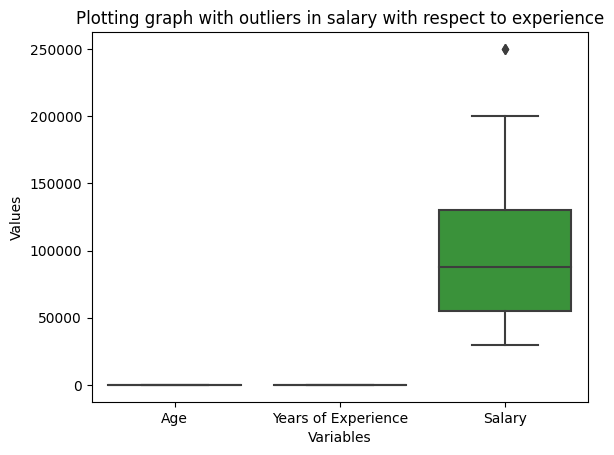

Number of outliers are 
 30    250000.0
83    250000.0
Name: Salary, dtype: float64
100


C:\Users\ABHISHEK KUMAR\AppData\Local\Temp\ipykernel_18004\1766076068.py:46: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if data['Salary'][i][(data['Salary'][i] <= l_b) | (data['Salary'][i] >= u_b)]:
C:\Users\ABHISHEK KUMAR\AppData\Local\Temp\ipykernel_18004\1766076068.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Salary'][i] = mean_of_salary
C:\Users\ABHISHEK KUMAR\AppData\Local\Temp\ipykernel_18004\1766076068.py:46: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if data['Salary'][i][(data['Salary'][i] <= l

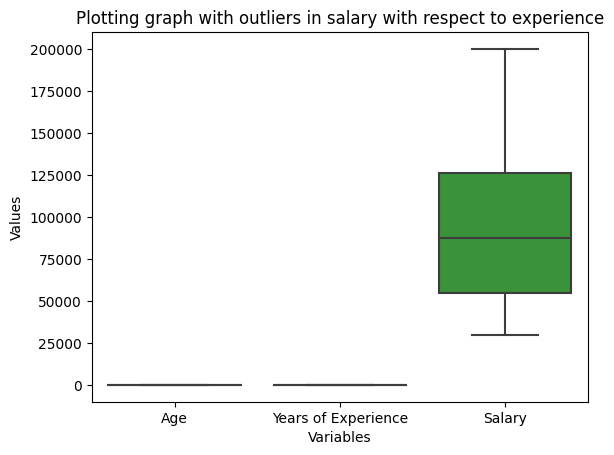

Number of outliers are 
 Series([], Name: Salary, dtype: float64)
[[88853.37344907]]


c:\Users\ABHISHEK KUMAR\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


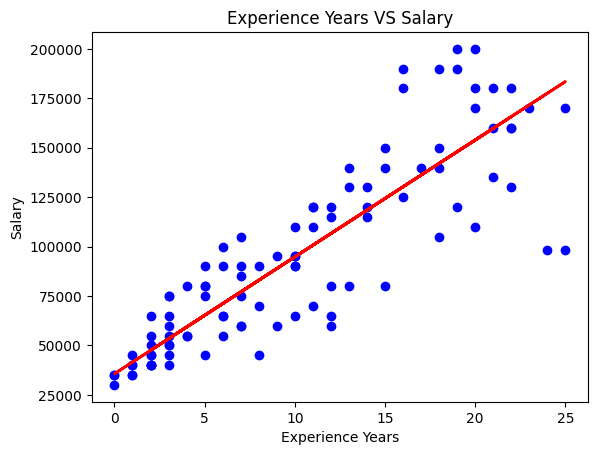

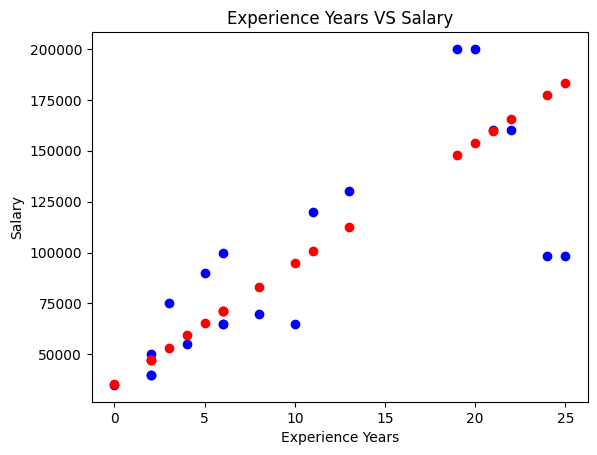

train_accuracy 0.7809518410637535
test_accuracy 0.5491378499526248


In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
# from sklearn.model_selection import train_test_split

#Loading the dataset
data = pd.read_csv("C:\\Users\\ABHISHEK KUMAR\\Desktop\\SalaryData.csv").head(100)
print(data)
print(data.isna().sum())


#Handling the missing values
data['Salary'].fillna(data['Salary'].mean(),inplace = True) ##data['Salary'] = data['Salary'].fillna(data['Salary'].mean())
print("\n\nAfter handling missing values")
print(data.isna().sum())
print("\n\n")


#Ploting graph to identify outliers
sns.boxplot(data)
plt.title("Plotting graph with outliers in salary with respect to experience")
plt.ylabel("Values")
plt.xlabel("Variables")
plt.show()


#Finding the upper and lower bound range of the data
q1 = data["Salary"].quantile(.25)
q3 = data['Salary'].quantile(.75)
IQR = q3 - q1
l_b = q1 - 1.5 * IQR
u_b = q3 + 1.5 * IQR

#Finding outliers
outliers = data['Salary'][(data['Salary'] <= l_b) | (data['Salary'] >= u_b)]
print("Number of outliers are \n",outliers)

#Replacing outliers with the mean value
mean_of_salary = data['Salary'].mean()
print(len(data))
for i in range (len(data)):
    if data['Salary'][i][(data['Salary'][i] <= l_b) | (data['Salary'][i] >= u_b)]:
        data['Salary'][i] = mean_of_salary

#Cross verifying with the outliers
#Ploting for outliers
sns.boxplot(data)
plt.title("Plotting graph with outliers in salary with respect to experience")
plt.ylabel("Values")
plt.xlabel("Variables")
plt.show()

#Showing 0 outliers
outliers = data['Salary'][(data['Salary'] <= l_b) | (data['Salary'] >= u_b)]
print("Number of outliers are \n",outliers)

#prporcessing with data with salary and experience columns
x=data[['Years of Experience']]
y=data[['Salary']]
# min_max_scaler = MinMaxScaler().fit(x)
# x_norm = min_max_scaler.transform(x)
# x_norm
#Splitting data with model
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,
random_state=42)
model = LinearRegression()
model.fit(x_train, y_train)
model
#Predicating y with x_test
y_pred = model.predict(x_test)
new_data = np.array([9]).reshape(-1, 1)
new_data
a = model.predict(new_data)
print(a)
#using scatter plot ploting x_test,y_tset and predicated y_pred with blue and red color
plt.scatter(x,y, color = "blue")
plt.plot(x_test, y_pred, color='red', linewidth=2)
plt.xlabel('Experience Years')
plt.ylabel('Salary')
plt.title('Experience Years VS Salary')
plt.show()
#using scatter plot ploting x_test,y_tset and predicated y_pred with blue and red color
plt.scatter(x_test,y_test, color = "blue")
plt.scatter(x_test,y_pred, color = "red")
plt.xlabel('Experience Years')
plt.ylabel('Salary')
plt.title('Experience Years VS Salary')
plt.show()
#Accuracy finding with x_train and y_train
train_accuracy = model.score(x_train, y_train  ) 
print("train_accuracy",train_accuracy)
#Accuracy finding with x_test and y_tset
test_accuracy = model.score(x_test, y_test )
print("test_accuracy",test_accuracy)

    time_study   Marks
0        4.508  19.202
1        0.096   7.734
2        3.133  13.811
3        7.909  53.018
4        7.811  55.299
..         ...     ...
95       3.561  19.128
96       0.301   5.609
97       7.163  41.444
98       0.309  12.027
99       6.335  32.357

[100 rows x 2 columns]


predicted value is  [[438.31759049]]


c:\Users\ABHISHEK KUMAR\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


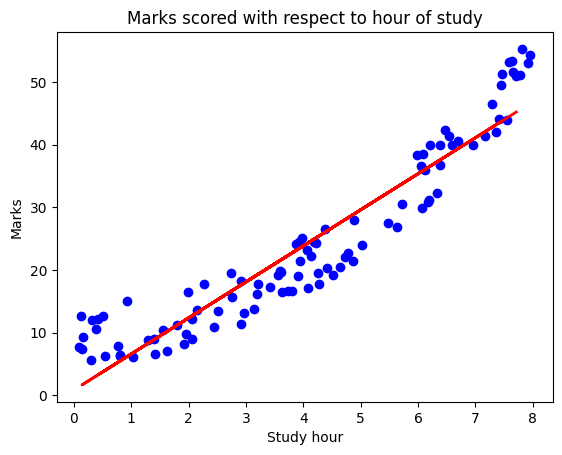

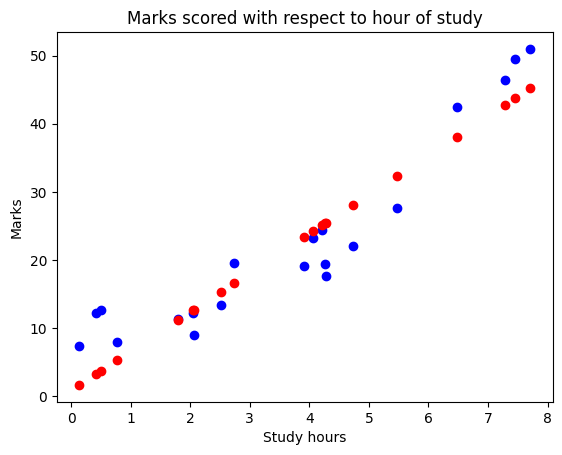

train_accuracy 0.8916306400509323
test_accuracy 0.867056814891106


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

data = pd.read_csv("C:\\Users\\ABHISHEK KUMAR\\Desktop\\Stud_marks.csv")
print(data)

x = data[['time_study']]
y = data[['Marks']]


x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=7)

model = LinearRegression()
model.fit(x_train,y_train)

y_pred = model.predict(x_test)
new_data = np.array([76]).reshape(-1,1)
a = model.predict(new_data)
print("\n\npredicted value is ",a)

plt.scatter(x,y, color = "blue")
plt.plot(x_test, y_pred, color='red', linewidth=2)
plt.xlabel('Study hour')
plt.ylabel('Marks')
plt.title('Marks scored with respect to hour of study')
plt.show()
#using scatter plot ploting x_test,y_tset and predicated y_pred with blue and red color
plt.scatter(x_test,y_test, color = "blue")
plt.scatter(x_test,y_pred, color = "red")
plt.xlabel('Study hours')
plt.ylabel('Marks')
plt.title('Marks scored with respect to hour of study')
plt.show()
#Accuracy finding with x_train and y_train
train_accuracy = model.score(x_train, y_train  ) 
print("train_accuracy",train_accuracy)
#Accuracy finding with x_test and y_tset
test_accuracy = model.score(x_test, y_test )
print("test_accuracy",test_accuracy)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State_Name     205 non-null    object 
 1   District_Name  205 non-null    object 
 2   Crop_Year      205 non-null    int64  
 3   Season         205 non-null    object 
 4   Crop           205 non-null    object 
 5   Area           205 non-null    float64
 6   Production     203 non-null    float64
dtypes: float64(2), int64(1), object(4)
memory usage: 11.3+ KB
None
State_Name       0
District_Name    0
Crop_Year        0
Season           0
Crop             0
Area             0
Production       0
dtype: int64
The predicted crop production for the year is  [[905627.03116751]]


c:\Users\ABHISHEK KUMAR\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


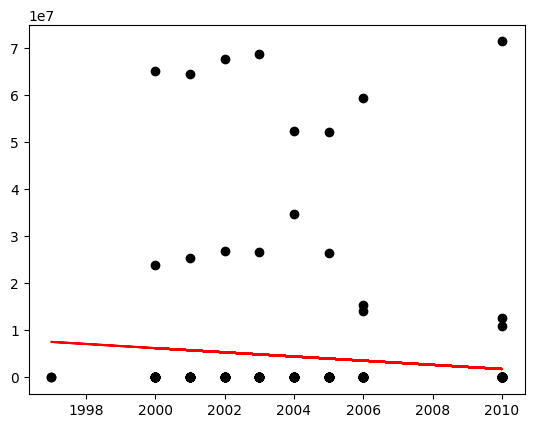

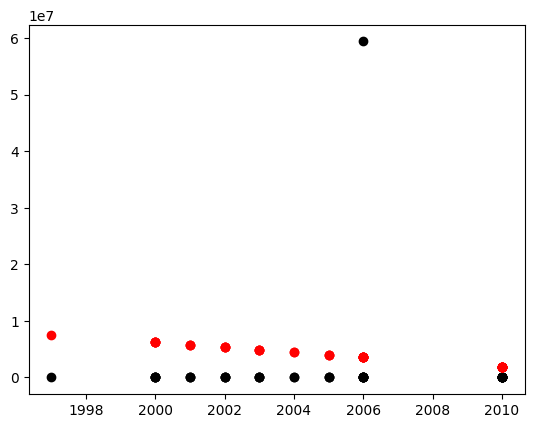

Accuracy of the training dataset is  0.012203449710662562
Accuracy of the test dataset is  -0.1301978213128394


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


data = pd.read_csv("C:\\Users\\ABHISHEK KUMAR\\Desktop\\crop_production.csv").head(205)

print(data.info())
data = data.bfill()
print(data.isna().sum())

x = data[['Crop_Year']]
y = data[['Production']]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2,random_state=7)

model = LinearRegression()
model.fit(x_train,y_train)

y_pred = model.predict(x_test)

new_data = np.array([2012]).reshape(-1,1)

a = model.predict(new_data)
print("The predicted crop production for the year is ",a)


plt.scatter(x,y,color='k')
plt.plot(x_test,y_pred,color='red')
plt.show()

plt.scatter(x_test,y_test,color='k')
plt.scatter(x_test,y_pred,color='red')
plt.show()


train = model.score(x_train,y_train)
print("Accuracy of the training dataset is ",train)
test = model.score(x_test,y_test)
print("Accuracy of the test dataset is ",test)

marks scored for the given IA marks is [[74.48853693]]


c:\Users\ABHISHEK KUMAR\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


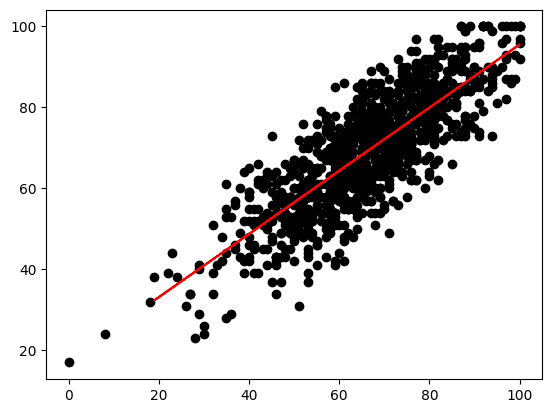

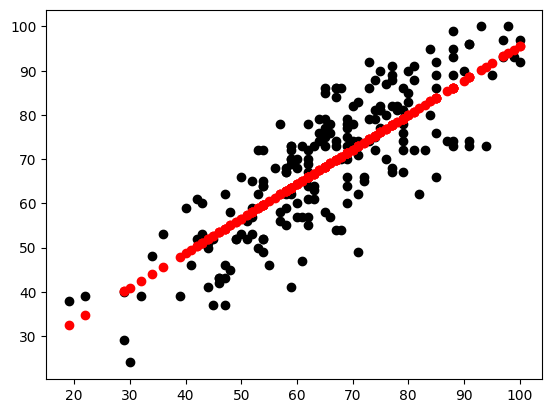

accuracy for training dataset is 0.6649470148508831
accuracy for test dataset is 0.6797093558623959


In [6]:
import pandas as  pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


data=pd.read_csv("C:\\Users\\ABHISHEK KUMAR\\Desktop\\StudentsPerformance.csv")

# sns.boxplot(data['IA marks'])
# plt.show()

x=data[['IA marks']]
y=data[['SEE marks']]


x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=19)
model=LinearRegression()
model.fit(x_train,y_train)

y_pred=model.predict(x_test)
new_data=np.array([73]).reshape(-1,1)
a=model.predict(new_data)
print("marks scored for the given IA marks is",a)

plt.scatter(x,y,color='k')
plt.plot(x_test,y_pred,color='red')
plt.show()

plt.scatter(x_test,y_test,color='k')
plt.scatter(x_test,y_pred,color='red')
plt.show()

train=model.score(x_train,y_train)
test=model.score(x_test,y_test)

print("accuracy for training dataset is",train)
print("accuracy for test dataset is",test)